In [1]:
import utilities
import os
import csv
import pandas as pd
from prettytable import PrettyTable
from prettytable import ALL as ALL

In [5]:
csvsubgrouped_skills = utilities.read_json("/home/c2/alexa/source/voice-assistant-central/NetworkAnalysis/data/skills_data/subgrouped_skills.json")
df = pd.read_csv("/home/c2/alexa/source/voice-assistant-central/NetworkAnalysis/data/report_unique_0307.csv")

In [6]:
df

,Unnamed: 0,Skill Categories,skill_name,FQDN,Domain Name,SLD,subdomain,Organization,Purpose,Party
0,0,Fashion Style,B083PY1PGZ,device-metrics-us-2.amazon.com,amazon.com,amazon,device-metrics-us-2,"Amazon Technologies, Inc.",Advertising/Tracking,Platform-based
1,136,Fashion Style,B083PY1PGZ,avs-alexa-14-na.amazon.com,amazon.com,amazon,avs-alexa-14-na,"Amazon Technologies, Inc.",Functional,Platform-based
2,438,Fashion Style,B083PY1PGZ,mlis.amazon.com,amazon.com,amazon,mlis,"Amazon Technologies, Inc.",Functional,Platform-based
3,2357,Fashion Style,B083PY1PGZ,prod.amcs-tachyon.com,amcs-tachyon.com,amcs-tachyon,prod,"Amazon Technologies, Inc.",Functional,Platform-based
4,3757,Fashion Style,B083PY1PGZ,d3p8zr0ffa9t17.cloudfront.net,cloudfront.net,cloudfront,d3p8zr0ffa9t17,"Amazon Technologies, Inc.",Functional,Platform-based
...,...,...,...,...,...,...,...,...,...,...
1802,964263,Health,B07QN179C5,avs-alexa-14-na.amazon.com,amazon.com,amazon,avs-alexa-14-na,"Amazon Technologies, Inc.",Functional,Platform-based
1803,964605,Health,B07QN179C5,mlis.amazon.com,amazon.com,amazon,mlis,"Amazon Technologies, Inc.",Functional,Platform-based
1804,964654,Health,B07PJWHYXM,prod.amcs-tachyon.com,amcs-tachyon.com,amcs-tachyon,prod,"Amazon Technologies, Inc.",Functional,Platform-based
1805,964656,Health,B07PJWHYXM,mlis.amazon.com,amazon.com,amazon,mlis,"Amazon Technologies, Inc.",Functional,Platform-based


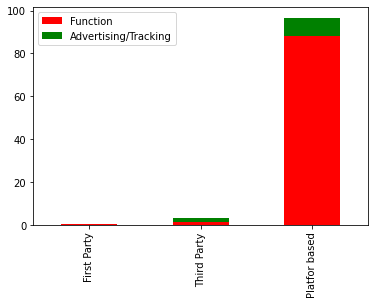

In [3]:
ads = [0, 1.68,8.62]
func = [0.31, 1.36,88]
party = ['First Party', 'Third Party', 'Platfor based']
df_plot = pd.DataFrame({'Function': func, 'Advertising/Tracking': ads}, index=party)
ax = df_plot.plot.bar(stacked=True, color={"Function": "red", "Advertising/Tracking": "green"})

### Plot Taxonomy

In [5]:
df_party = df[['Party', 'Purpose']]
outer = df_party.groupby(['Party']).count()
outer

KeyError: "None of [Index(['Party', 'Purpose'], dtype='object')] are in the [columns]"

In [6]:
inner = df_party.groupby(['Party', 'Purpose']).size()
inner

NameError: name 'df_party' is not defined

In [61]:
inner_labels = inner.index.get_level_values(1)
inner_labels

Index(['Function', 'Advertising/Tracking', 'Function', 'Advertising/Tracking',
       'Function'],
      dtype='object', name='Purpose')

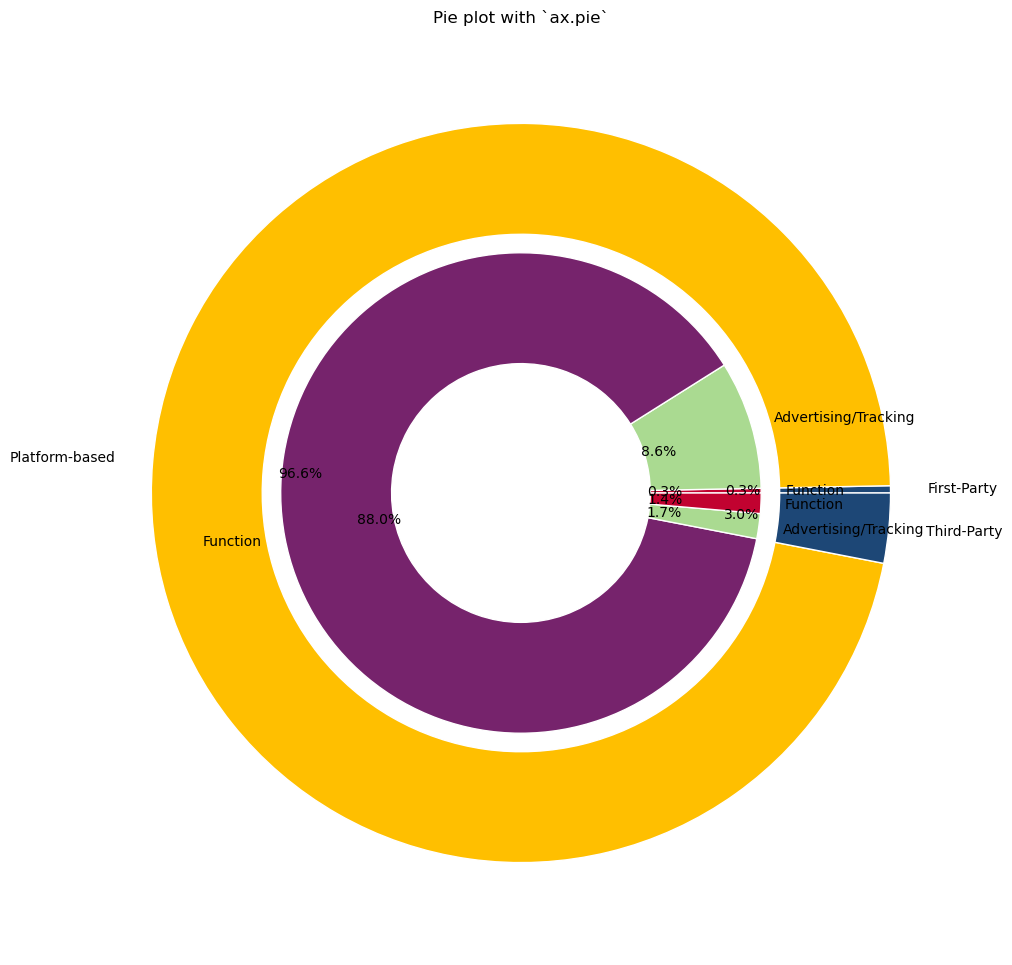

In [62]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(24,12))
size = 0.3



ax.pie(outer.values.flatten(), radius=1,
       labels=outer.index,
       autopct='%1.1f%%',
       colors=["#1D4776", "#FFBF00"],
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=0.65, 
       labels = inner_labels,
       autopct='%1.1f%%',
       colors=["#C10230", "#AADA91", "#76236C", "#AADA91"],
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.savefig("pie.png")
plt.show()

In [8]:
df_fqdn = df.loc[df['Party'] == 'Platform-based', 'FQDN']
platform_base = {}
for fqdn in df_fqdn:
    if fqdn not in platform_base:
        platform_base[fqdn] = 1
    else:
        platform_base[fqdn] += 1
fqdn_skill_num_sorted = dict(sorted(platform_base.items(), key=lambda kv: kv[1], reverse=True))

findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.


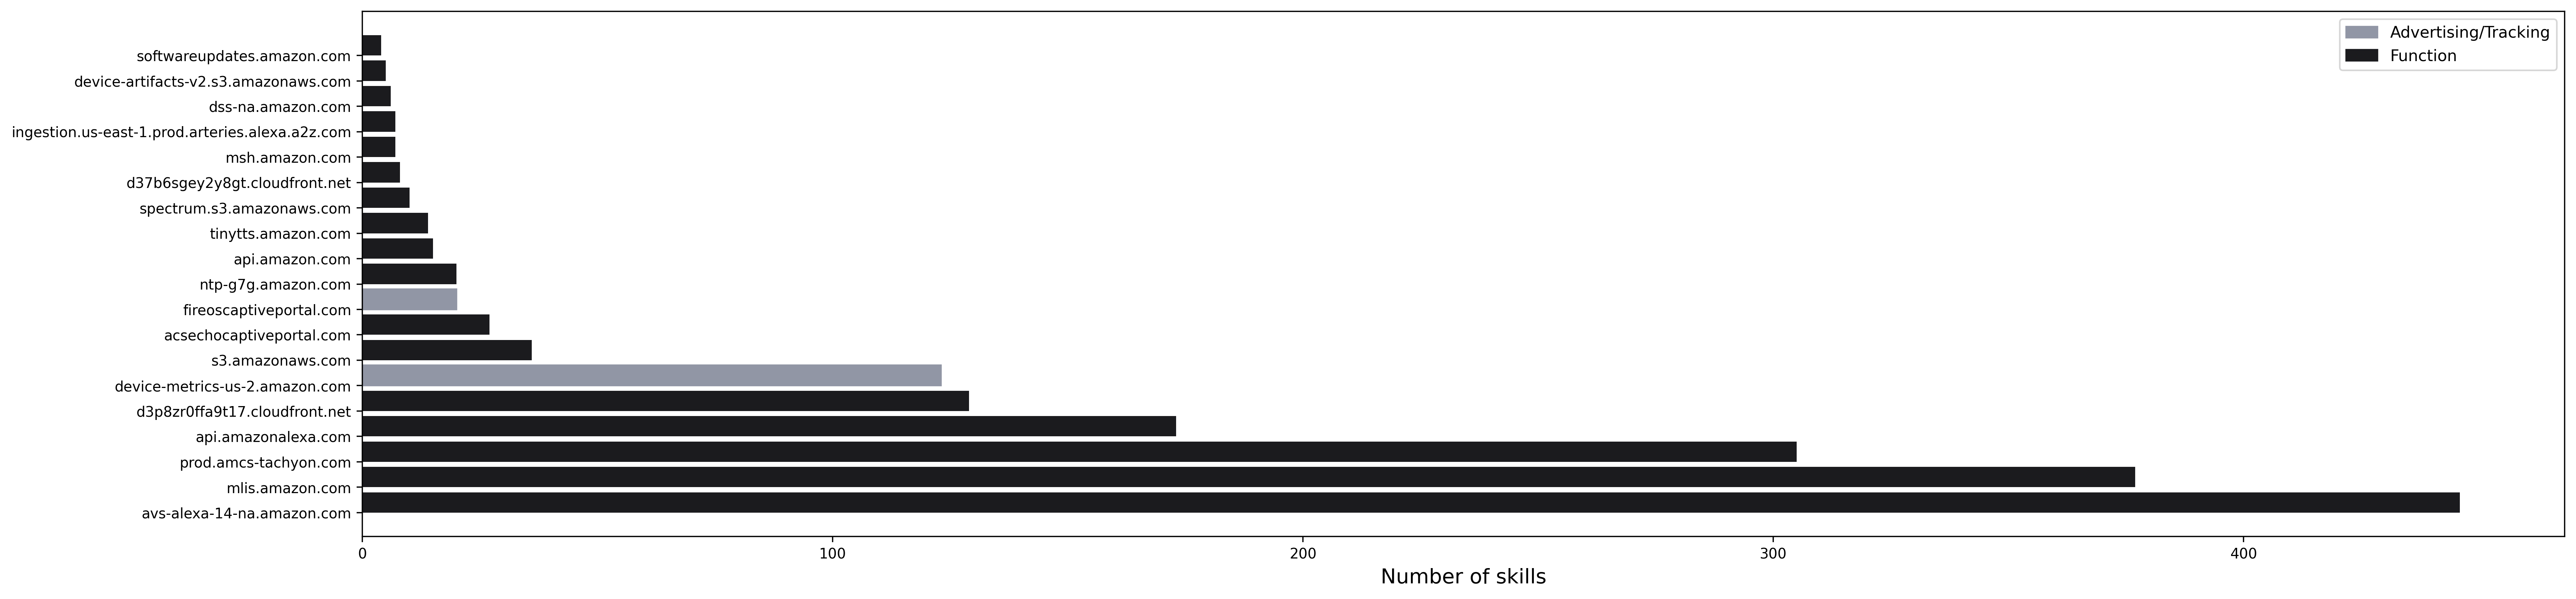

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 12})


# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(25, 6), dpi=320)

# Example data
N = 19
fqdns = [fqdn for fqdn, skills_nums in fqdn_skill_num_sorted.items()][:N]
y_pos = np.arange(0,N,1)
performance = [skills_nums for fqdn, skills_nums in fqdn_skill_num_sorted.items()][:N]
#error = np.random.rand(len(fqdns))

bar_list = ax.barh(y_pos, performance, align='edge', color = '#1B1B1E')

dict_fqdns = utilities.read_json("/home/c2/alexa/source/voice-assistant-central/NetworkAnalysis/data/dict_fqdns_0307.json")
for i, fqdn in enumerate(fqdns):
    if dict_fqdns[fqdn]["ATSes"] == 'Advertising/Tracking':
        bar_list[i].set_color('#9196a5')
        
ax.set_yticks(y_pos)
ax.set_yticklabels(fqdns)
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of skills', size=13, fontname="Times New Roman Bold")
ax.xaxis.set_tick_params(labelsize=9)
ax.yaxis.set_tick_params(labelsize=9)
#ax.set_title('Paltform_based FQDNs accessed by skills')
colors = {'Function' : '#1B1B1E', 'Advertising/Tracking': '#9196a5'}
labels = ['Advertising/Tracking', 'Function']
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.savefig('platform_barchart.pdf')
plt.show()


In [11]:
df_fqdn_non = df.loc[df['Party'] == 'Third-Party', 'FQDN']
non_platform_base = {}
for fqdn in df_fqdn_non:
    if fqdn not in non_platform_base:
        non_platform_base[fqdn] = 1
    else:
        non_platform_base[fqdn] += 1
fqdn_skill_num_sorted_non = dict(sorted(non_platform_base.items(), key=lambda kv: kv[1], reverse=True))

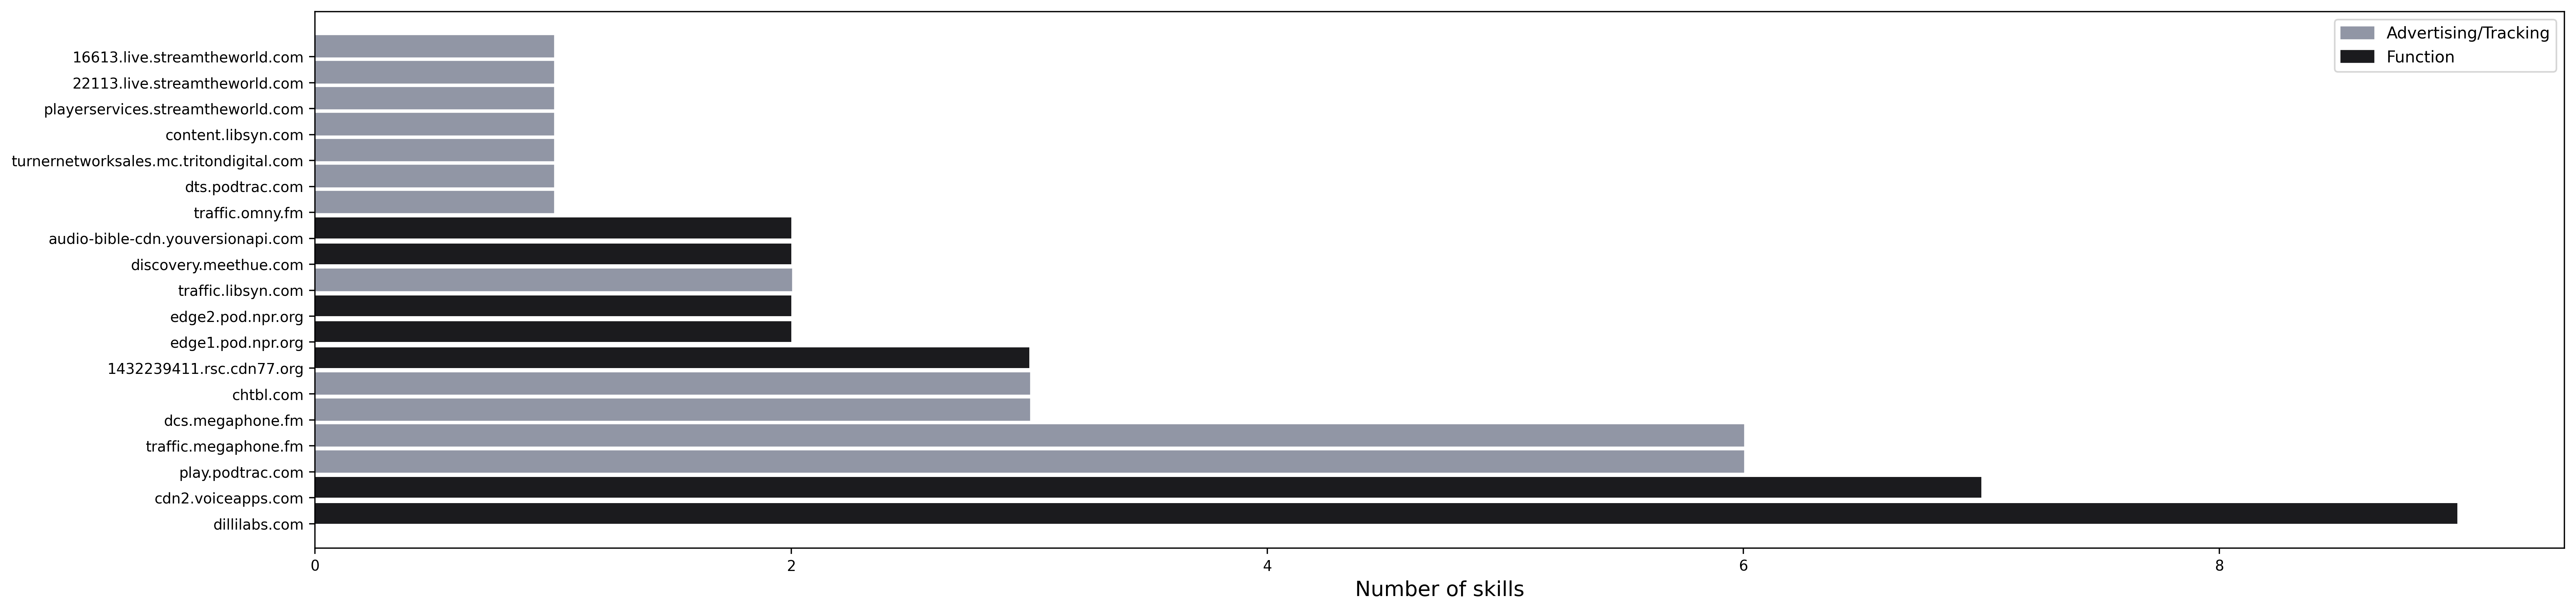

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 13})

# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(25, 6), dpi=320)

# Example data
fqdns = [fqdn for fqdn, skills_nums in fqdn_skill_num_sorted_non.items()]
y_pos = np.arange(0,len(fqdn_skill_num_sorted_non),1)
performance = [skills_nums for fqdn, skills_nums in fqdn_skill_num_sorted_non.items()]
#error = np.random.rand(len(fqdns))
#
bar_list = ax.barh(y_pos, performance, align='edge', color='#1B1B1E')

dict_fqdns = utilities.read_json("/home/c2/alexa/source/voice-assistant-central/NetworkAnalysis/data/dict_fqdns_0307.json")
for i, fqdn in enumerate(fqdns):
    if dict_fqdns[fqdn]["ATSes"] == 'Advertising/Tracking':
        bar_list[i].set_color('#9196a5')
            
ax.set_yticks(y_pos)
ax.set_yticklabels(fqdns)
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of skills', size=13, fontname="Times New Roman Bold")
ax.xaxis.set_tick_params(labelsize=9)
ax.yaxis.set_tick_params(labelsize=9)
colors = {'Function' : '#1B1B1E', 'Advertising/Tracking': '#9196a5'}
labels = ['Advertising/Tracking', 'Function']
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
#ax.set_title('Top-30 domains accessed by skills')
plt.savefig('thirdparty_barchart.pdf')
plt.show()

In [14]:
df['count']=1
df

,Unnamed: 0,Skill Categories,skill_name,FQDN,Domain Name,SLD,subdomain,Organization,Purpose,Party,count
0,0,Fashion Style,B083PY1PGZ,device-metrics-us-2.amazon.com,amazon.com,amazon,device-metrics-us-2,"Amazon Technologies, Inc.",Advertising/Tracking,Platform-based,1
1,136,Fashion Style,B083PY1PGZ,avs-alexa-14-na.amazon.com,amazon.com,amazon,avs-alexa-14-na,"Amazon Technologies, Inc.",Functional,Platform-based,1
2,438,Fashion Style,B083PY1PGZ,mlis.amazon.com,amazon.com,amazon,mlis,"Amazon Technologies, Inc.",Functional,Platform-based,1
3,2357,Fashion Style,B083PY1PGZ,prod.amcs-tachyon.com,amcs-tachyon.com,amcs-tachyon,prod,"Amazon Technologies, Inc.",Functional,Platform-based,1
4,3757,Fashion Style,B083PY1PGZ,d3p8zr0ffa9t17.cloudfront.net,cloudfront.net,cloudfront,d3p8zr0ffa9t17,"Amazon Technologies, Inc.",Functional,Platform-based,1
...,...,...,...,...,...,...,...,...,...,...,...
1802,964263,Health,B07QN179C5,avs-alexa-14-na.amazon.com,amazon.com,amazon,avs-alexa-14-na,"Amazon Technologies, Inc.",Functional,Platform-based,1
1803,964605,Health,B07QN179C5,mlis.amazon.com,amazon.com,amazon,mlis,"Amazon Technologies, Inc.",Functional,Platform-based,1
1804,964654,Health,B07PJWHYXM,prod.amcs-tachyon.com,amcs-tachyon.com,amcs-tachyon,prod,"Amazon Technologies, Inc.",Functional,Platform-based,1
1805,964656,Health,B07PJWHYXM,mlis.amazon.com,amazon.com,amazon,mlis,"Amazon Technologies, Inc.",Functional,Platform-based,1


In [17]:
categories = ['Skill Categories', 'Domain Name', 'Organization', 'Purpose']
df[categories].values

array([['Fashion Style', 'amazon.com', 'Amazon Technologies, Inc.',
        'Advertising/Tracking'],
       ['Fashion Style', 'amazon.com', 'Amazon Technologies, Inc.',
        'Functional'],
       ['Fashion Style', 'amazon.com', 'Amazon Technologies, Inc.',
        'Functional'],
       ...,
       ['Health', 'amcs-tachyon.com', 'Amazon Technologies, Inc.',
        'Functional'],
       ['Health', 'amazon.com', 'Amazon Technologies, Inc.',
        'Functional'],
       ['Health', 'amazon.com', 'Amazon Technologies, Inc.',
        'Functional']], dtype=object)

In [31]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

categories = ['Skill Categories', 'Domain Name', 'Organization', 'Purpose']

newDf = pd.DataFrame()
for i in range(len(categories)-1):
    tempDf = df[[categories[i],categories[i+1],'count']]
    tempDf.columns = ['source','target','count']
    newDf = pd.concat([newDf,tempDf])    
newDf = newDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()


label_list = list(np.unique(df[categories].values.astype('str')))
source = newDf['source'].apply(lambda x: label_list.index(x))
target = newDf['target'].apply(lambda x: label_list.index(x))
count = newDf['count']

fig = go.Figure(data=[go.Sankey(
    node = {"label": label_list, "color" : "black", 'pad':15, 'thickness' :8},
    link = {"source": source, "target": target, "value": count}
    )])

fig.show()

<Figure size 640x480 with 0 Axes>